In [1]:
# NB: per eseguire questo notebook come file Python, scegliere il menù "File -> Download as -> Python (.py)" .
# Da Canopy, scommentando questa istruzione si hanno i grafici nella console e non in finestre aggiuntive:
#get_ipython().magic(u'matplotlib inline')
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from apprendimento_neurale import *

Text(0.5,1,'Sigmoid logistic')

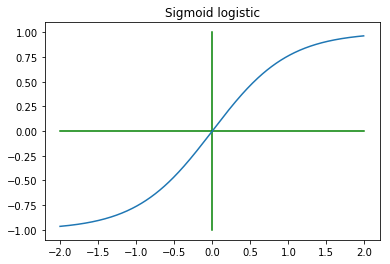

In [2]:
x = np.arange(-2.,2.,0.01)
s = sigmoid_logistic(x)
plt.figure(1), plt.plot([-2., 2.],[0., 0.],'g-'); plt.plot([0., 0.],[-1., 1.],'g-'); plt.plot(x,s); 
plt.title("Sigmoid logistic")

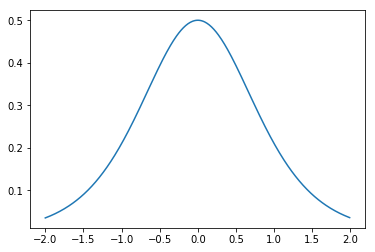

In [3]:
Ds = sigmoid_logistic_derivative(x)
plt.figure(1), plt.plot(x,Ds); 

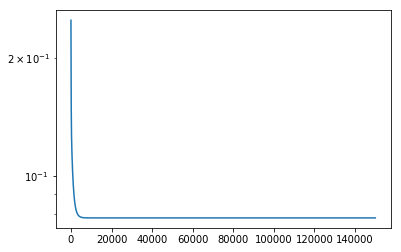

In [4]:
# apprendimento legge AND:
n_neurons_first_layer = 1
input = np.array([[0, 0, 1, 1],[0, 1, 0, 1]])
target = np.array([[0, 0, 0, 1]])
#target = (target - 0.5) * 2  # normalizzazione del target specifica per questo problema
toll = 1e-3
W1,W2,err_pred_hist,target_pred_hist,grad_sqnorm_hist,iter_done = apprendimento_neurale(n_neurons_first_layer,input,\
                            target,toll,maxiter=150000,eta=0.001,decim_ris_ratio=1)
plt.figure(1); plt.semilogy(err_pred_hist[1:iter_done]);

In [5]:
print(np.squeeze(np.array(target_pred_hist[:,-1])))

[-0.24074788  0.24074788  0.24074788  0.62659872]


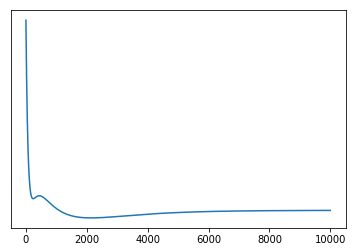

In [14]:
# apprendimento legge XOR:
n_neurons_first_layer = 1
input = np.array([[0, 0, 1, 1],[0, 1, 0, 1]])
target = np.matrix([[0, 1, 1, 0]])
target = (target - 0.5) * 2  # normalizzazione del target specifica per questo problema
toll = 1e-3
W1,W2,err_pred_hist,target_pred_hist,grad_sqnorm_hist,iter_done = apprendimento_neurale(n_neurons_first_layer,input,\
                                        target,toll,maxiter=10000,eta=0.001,decim_ris_ratio=1)
plt.figure(1); plt.semilogy(err_pred_hist[1:iter_done]);

In [15]:
np.squeeze(target_pred_hist[:,-1])

array([ 0.00099751, -0.00100157, -0.00100152,  0.00100339])

target =  [[0 1 1 0]]


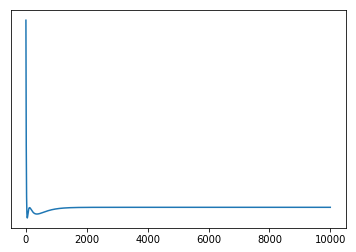

In [18]:
# apprendimento legge XOR con più neuroni:
input = np.array([[0, 0, 1, 1],[0, 1, 0, 1]])
target = np.array([[0, 1, 1, 0]]); print("target = ",target)
target = (target - 0.5) * 2  # normalizzazione del target specifica per questo problema
n_neurons_first_layer = 5
toll = 1e-3
# NB: change "eta" from 0.001 to 0.8 and see!
W1,W2,err_pred_hist,target_pred_hist,grad_sqnorm_hist,iter_done = apprendimento_neurale(n_neurons_first_layer,input,\
                                    target,toll,maxiter=10000,eta=0.001,decim_ris_ratio=1)
plt.figure(4); plt.semilogy(err_pred_hist[1:iter_done]);

In [11]:
np.squeeze(np.array(target_pred_hist[:,-1]))

array([-0.99870296,  0.9967699 ,  0.95335921, -0.95759821])

In [16]:
# approssimazione di una funzione:
h = 0.8
y_veri = np.concatenate((np.sin(np.arange(0.,2.*pi+h,h)), -np.sin(np.arange(0.,2.*pi+h,h))+1.))
maxy = max(y_veri)
miny = min(y_veri)
y_veri = (y_veri - (maxy+miny)/2.) / ((maxy-miny)/1.8); print("y_veri.shape = ",y_veri.shape)

y_veri.shape =  (18,)


target =  [[-0.30076904  0.13074797  0.30051255  0.10554779 -0.33588332 -0.75601457
  -0.9        -0.68049997 -0.23066026  0.30076904 -0.13074797 -0.30051255
  -0.10554779  0.33588332  0.75601457  0.9         0.68049997  0.23066026]]


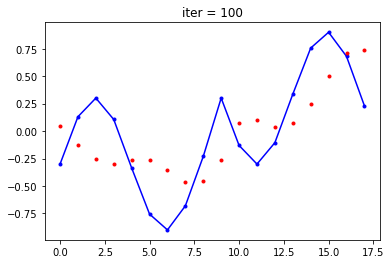

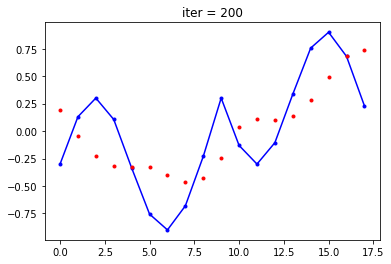

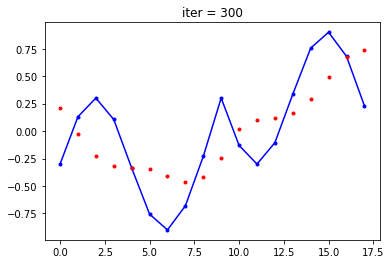

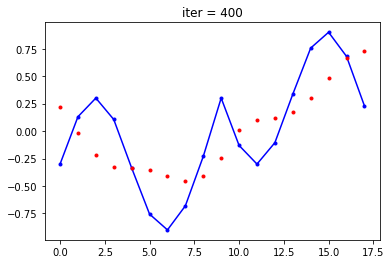

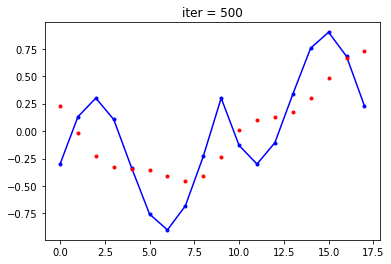

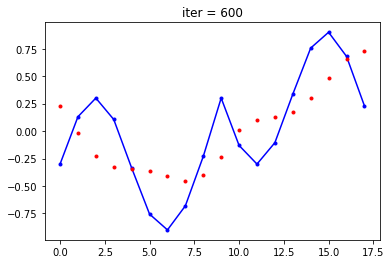

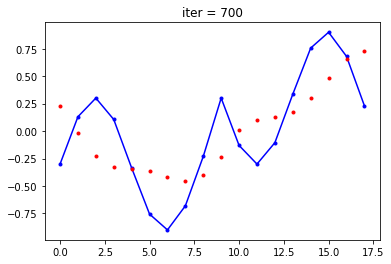

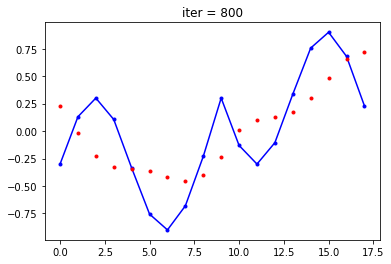

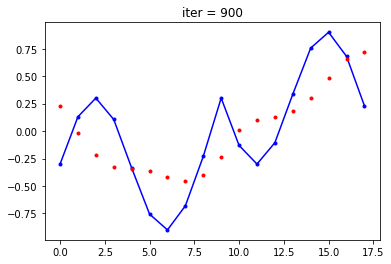

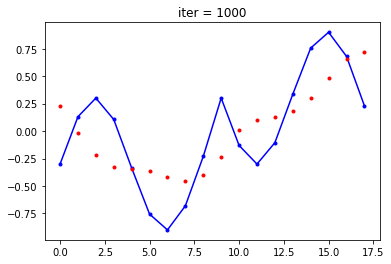

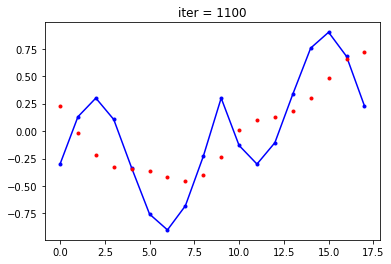

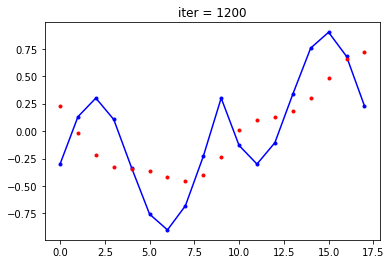

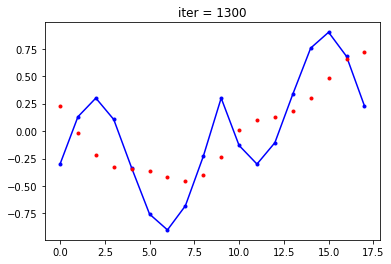

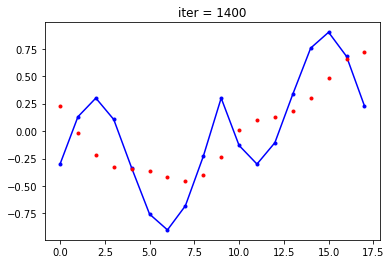

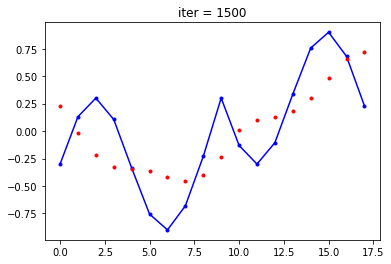

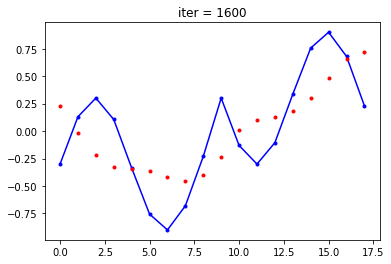

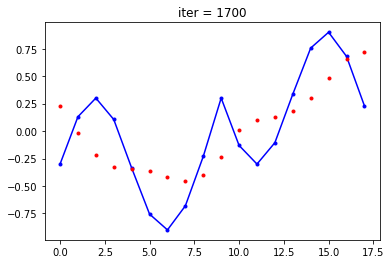

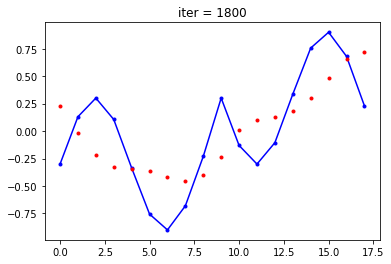

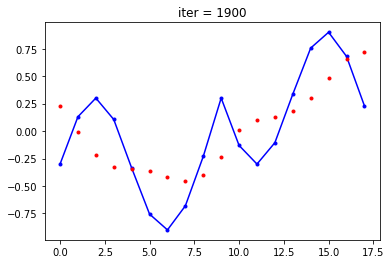

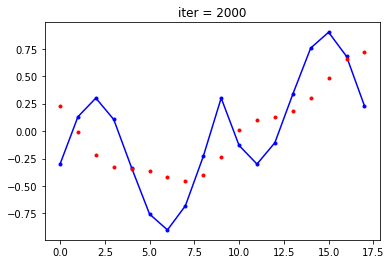

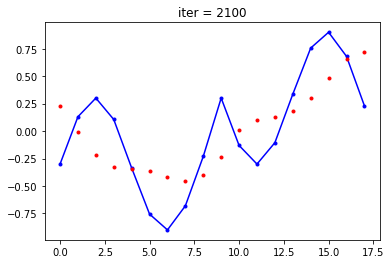

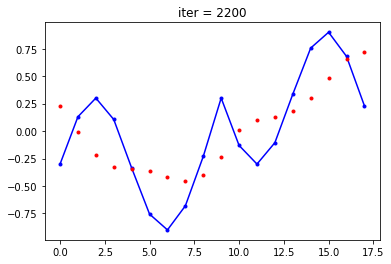

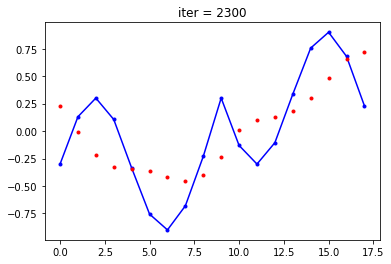

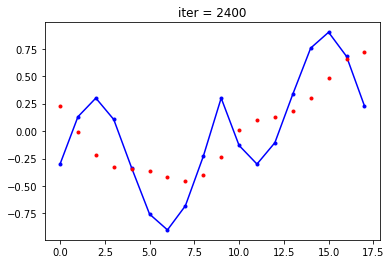

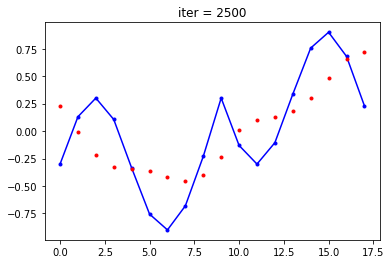

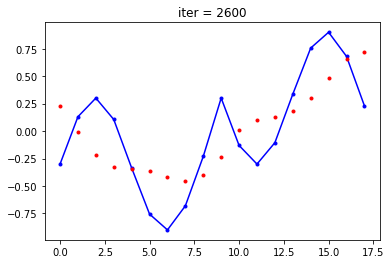

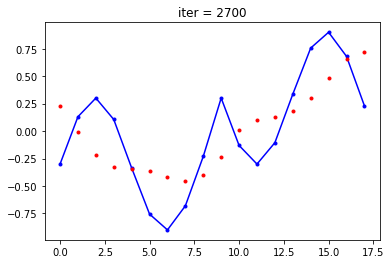

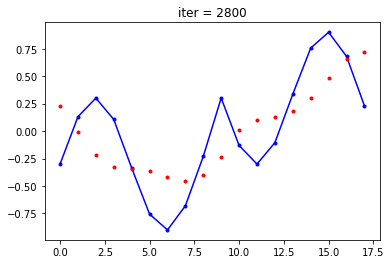

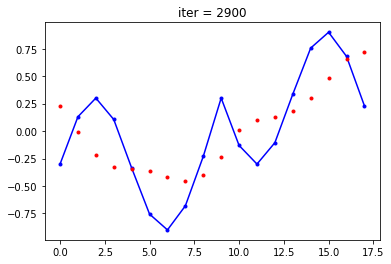

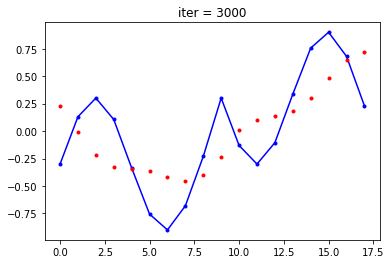

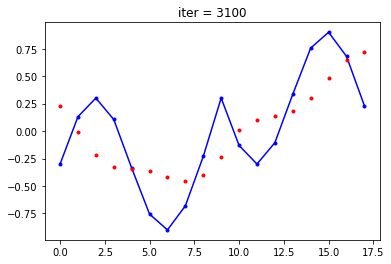

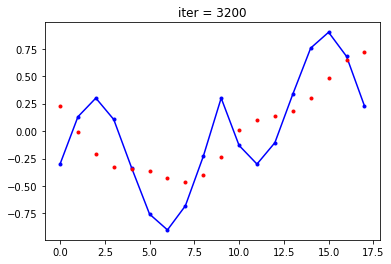

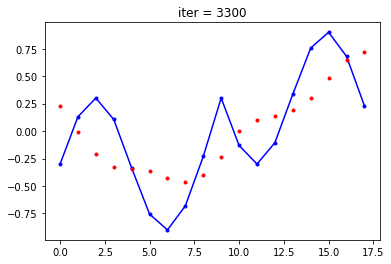

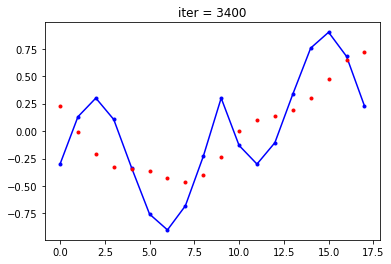

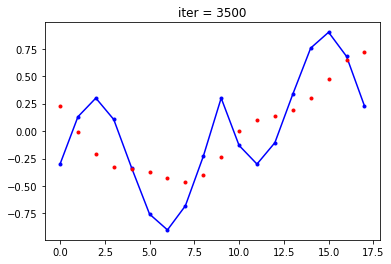

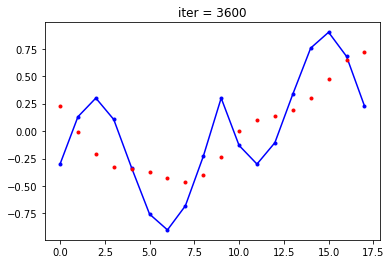

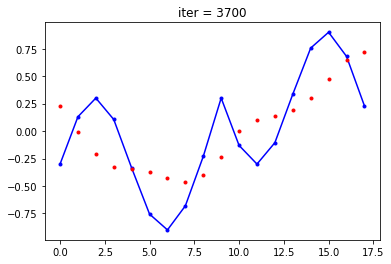

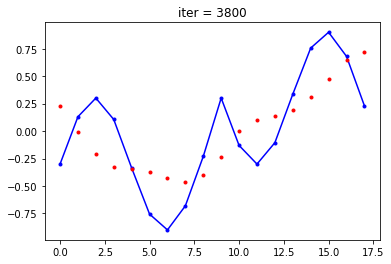

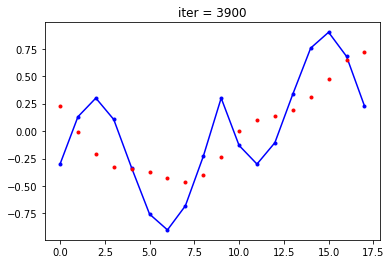

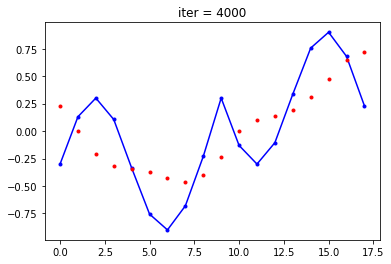

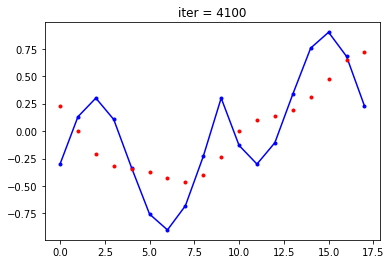

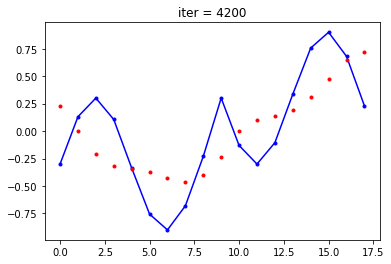

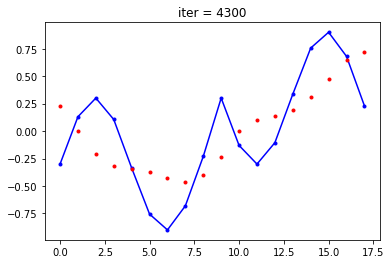

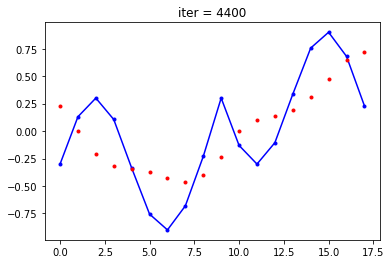

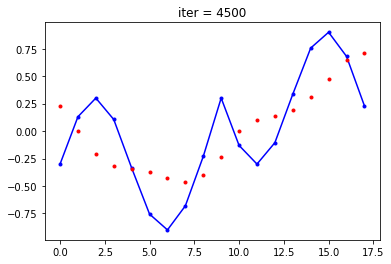

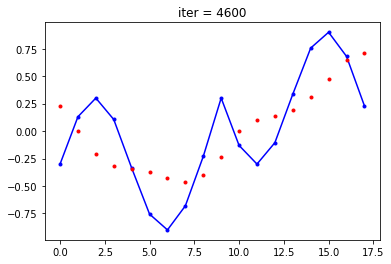

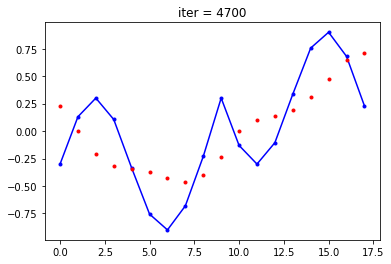

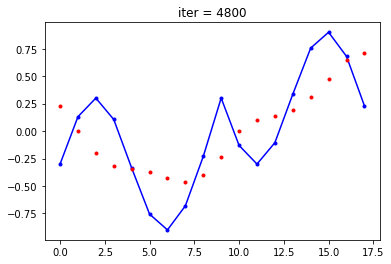

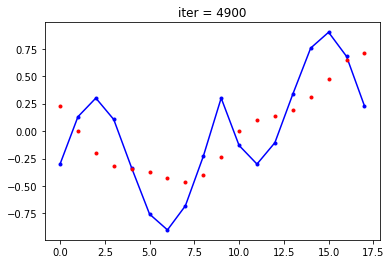

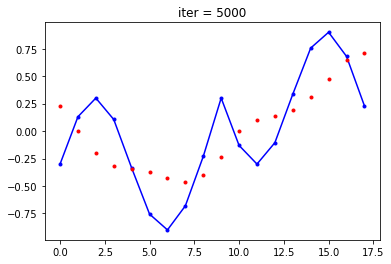

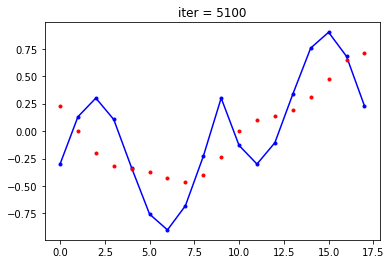

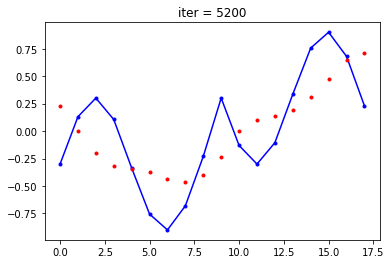

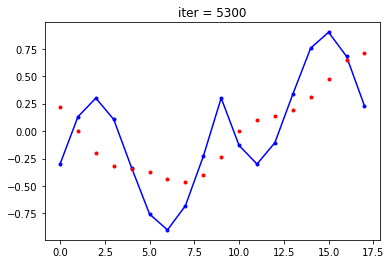

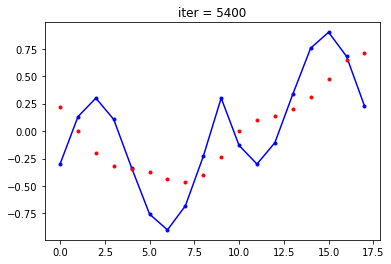

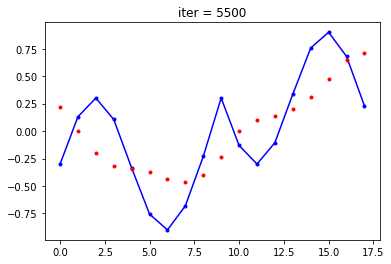

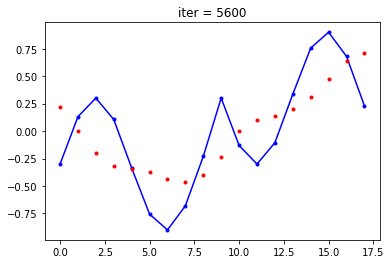

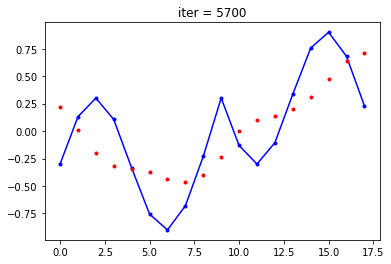

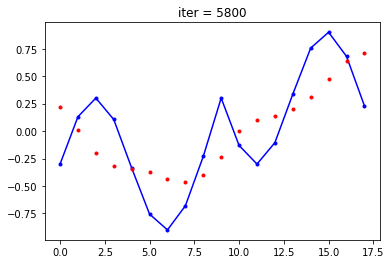

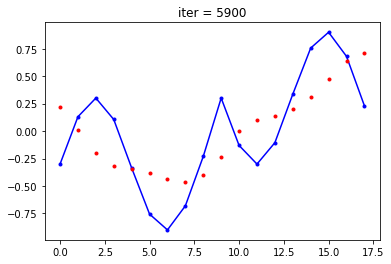

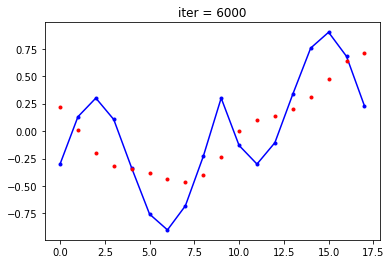

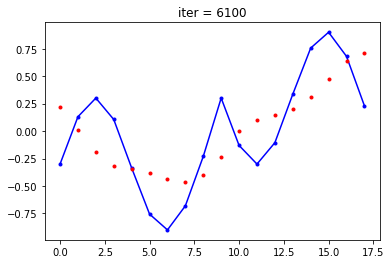

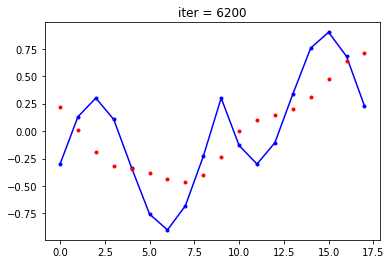

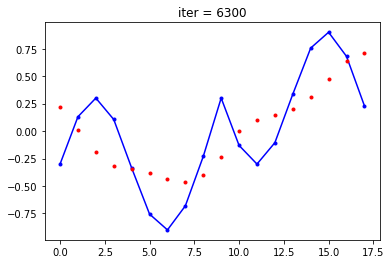

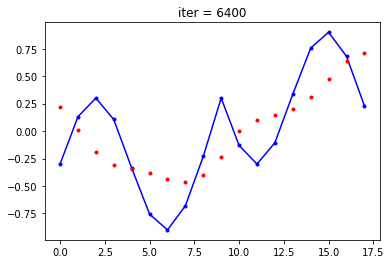

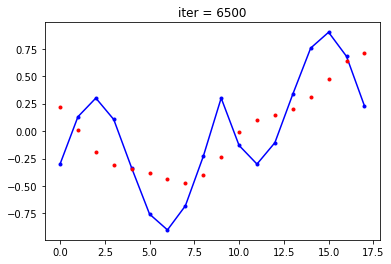

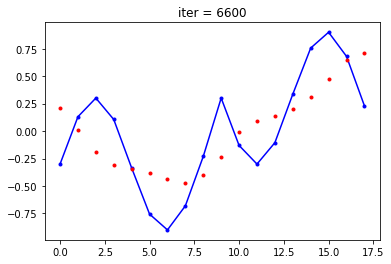

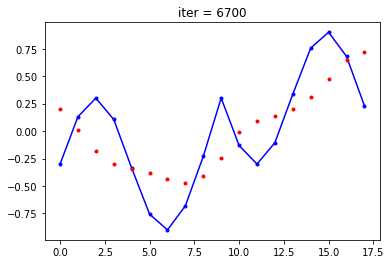

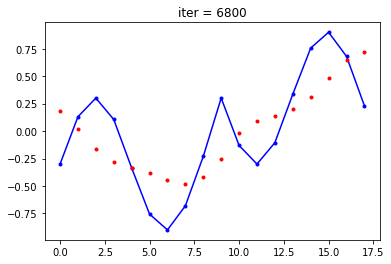

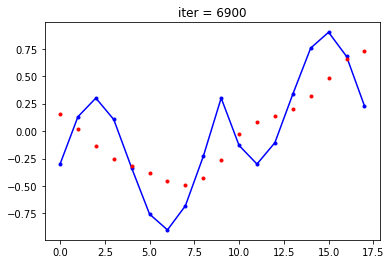

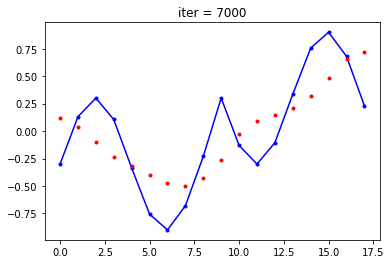

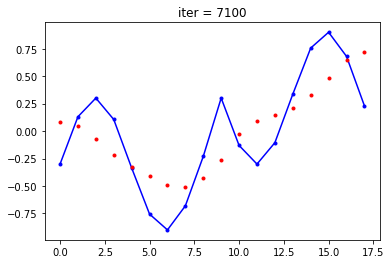

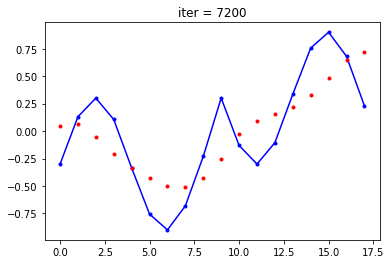

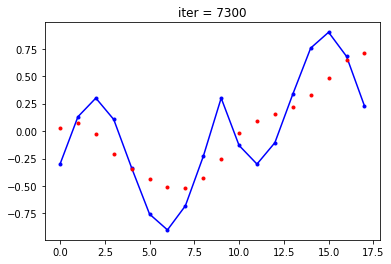

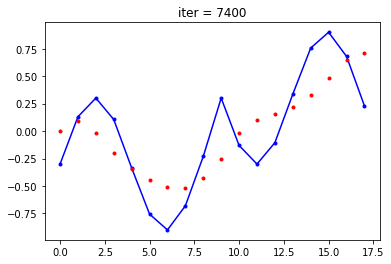

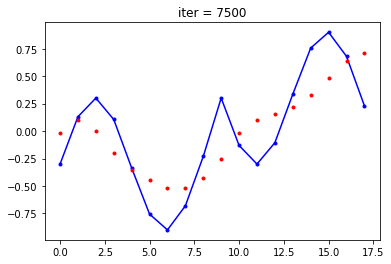

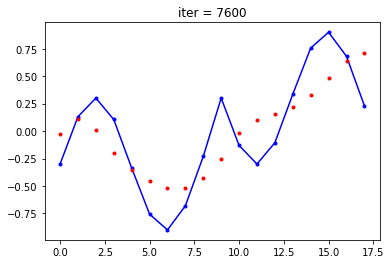

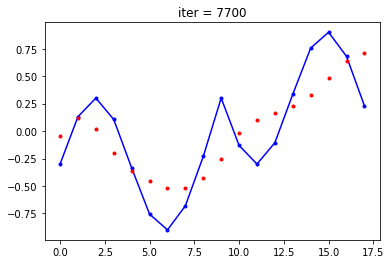

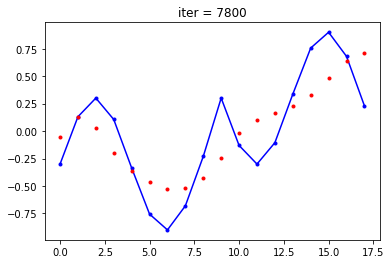

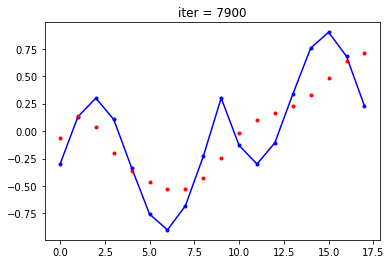

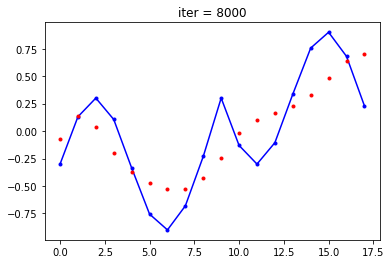

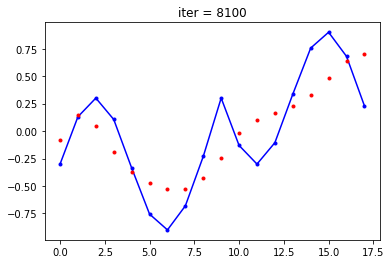

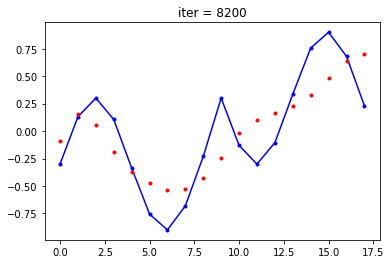

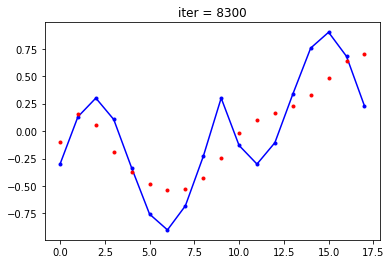

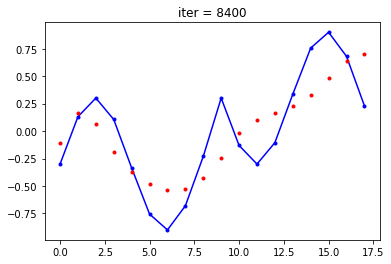

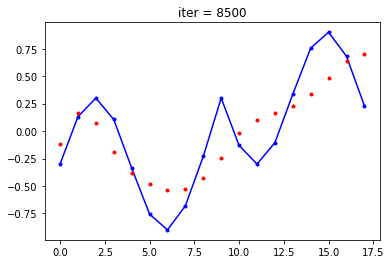

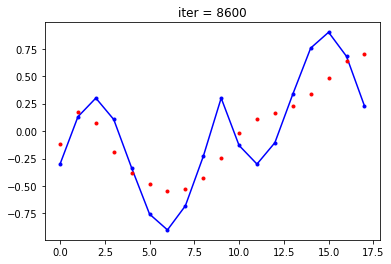

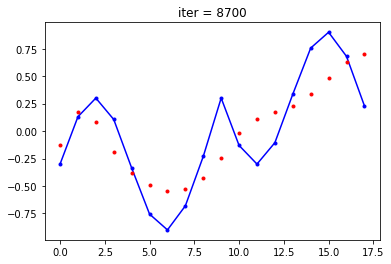

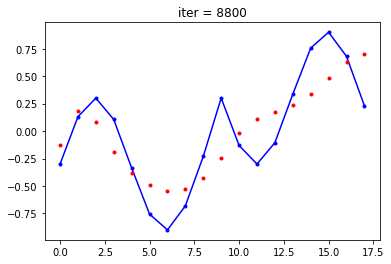

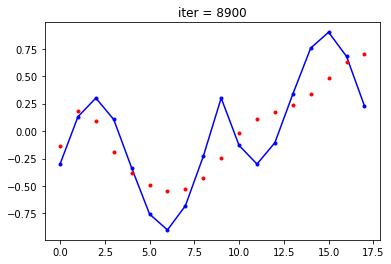

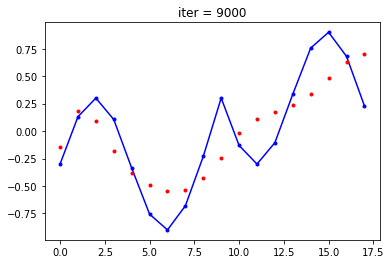

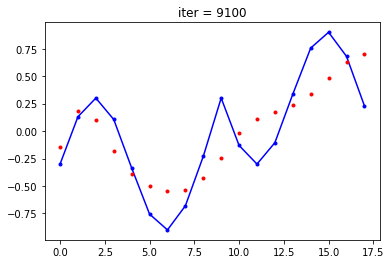

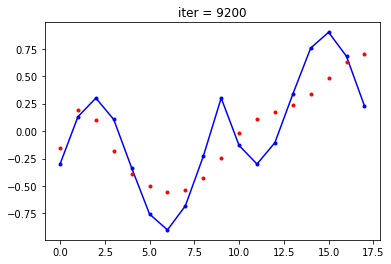

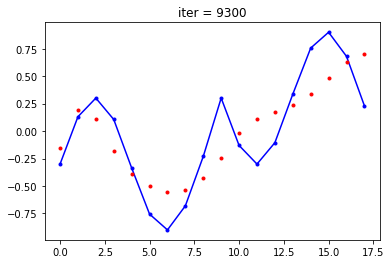

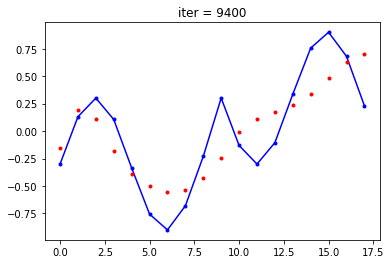

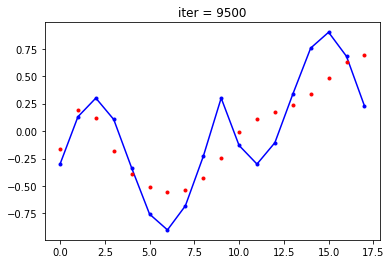

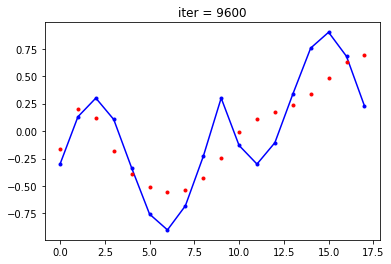

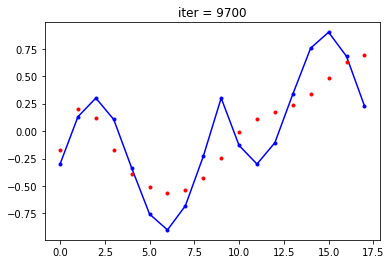

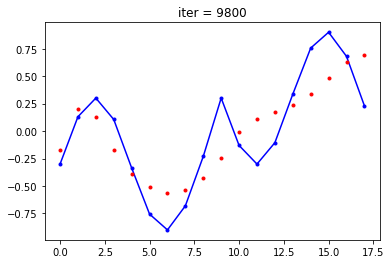

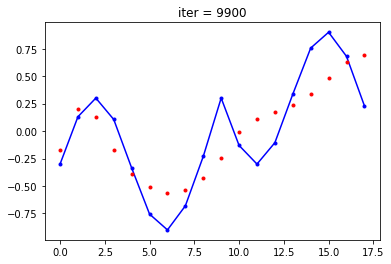

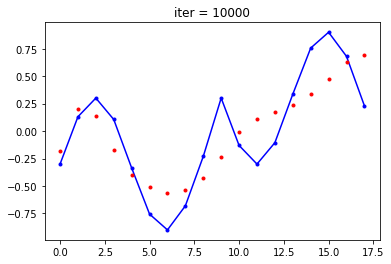

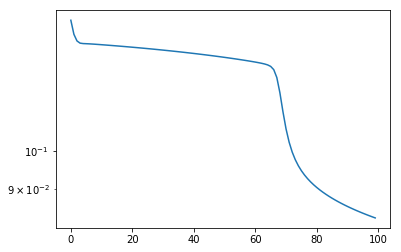

In [20]:
n_neurons_first_layer = 18
toll = 1e-3
input = np.atleast_2d(np.arange(len(y_veri)))
target = np.atleast_2d(y_veri); #print("target = ",target)
W1,W2,err_pred_hist,target_pred_hist,grad_sqnorm_hist,iter_done = apprendimento_neurale(n_neurons_first_layer,input,\
                    target,toll,graphics=True,maxiter=10000,eta=0.001,decim_ris_ratio=100)
plt.figure(1); plt.semilogy(err_pred_hist[1:iter_done]);
v_target_pred = np.squeeze(np.array(target_pred_hist[:,-1]))

In [ ]:
plt.figure(1); plt.plot(y_veri,'b.-'); plt.plot(target_pred_hist[:,-1],'r.');